# Tienda de video juegos online Ice

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [1]:
#Inicialización
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import seaborn as sns
import math 
from scipy.stats import ttest_ind

## Paso 1. Abrir el archivo de datos y estudiar la información general 

In [2]:
# Cargar datos
df_games = pd.read_csv('/datasets/games.csv')

#Información general 

display(df_games.info())
display(df_games.sample(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14381,Castlevania: Lords of Shadow - Reverie,PS3,2011.0,Action,0.02,0.00,0.00,0.01,NaN,NaN,NaN
10053,The Price is Right: Decades,X360,2011.0,Misc,0.11,0.00,0.00,0.01,NaN,tbd,E10+
5983,Alvin and the Chipmunks: The Squeakquel,DS,2009.0,Misc,0.27,0.00,0.00,0.02,NaN,tbd,E
10856,Hakuoki: Demon of the Fleeting Blossom,PSP,2009.0,Adventure,0.08,0.00,0.00,0.01,79.0,8.3,M
14813,Frogger: Ancient Shadow,XB,2005.0,Platform,0.02,0.01,0.00,0.00,47.0,tbd,E
1801,Naruto Shippuden: Ultimate Ninja Storm 4,PS4,2016.0,Fighting,0.41,0.45,0.11,0.17,79.0,8.2,T
6256,Over the Hedge,DS,2006.0,Platform,0.24,0.01,0.00,0.02,71.0,6.4,E
4379,Brunswick Pro Bowling,X360,2010.0,Sports,0.38,0.04,0.00,0.03,44.0,tbd,E
7146,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010.0,Platform,0.13,0.06,0.00,0.04,NaN,tbd,E10+
8688,AC/DC LIVE: Rock Band Track Pack,PS2,2008.0,Misc,0.08,0.06,0.00,0.02,NaN,tbd,T


**La tienda online Ice vende videojuegos por todo el mundo y en su dataset presenta:**

16715 entradas en total

Descripción de datos


— Name (Nombre): 16713, posiblemente con valores ausentes, tipo de dato: object 

— Platform (Plataforma): 16715, no tiene valores ausentes, tipo de dato: object 

— Year_of_Release (Año de lanzamiento): 16446, posiblemente tiene valores ausentes, tipo de dato: float64

— Genre (Género): 16713, posiblemente con valores ausentes, tipo de dato: object 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses): 16715, no tiene valores ausentes, tipo de dato: float64 

— EU_sales (ventas en Europa en millones de dólares estadounidenses): 16715, no tiene valores ausentes, tipo de dato: float64

— JP_sales (ventas en Japón en millones de dólares estadounidenses): 16715, no tiene valores ausentes, tipo de dato: float64 

— Other_sales (ventas en otros países en millones de dólares estadounidenses): 16715, no tiene valores ausentes, tipo de dato: float64

— Critic_Score (máximo de 100): 8137, posiblemente tiene valores ausentes, tipo de dato: float64

— User_Score (máximo de 10): 10014, posiblemente con valores ausentes, tipo de dato: object 

— Rating (ESRB): 9949, posiblemente con valores ausentes, tipo de dato: object 

Se va a proceder a hacer una limpieza de datos:

- Reemplazar los nombres de las columnas (ponerlos en minúsculas).

- Convertir los datos en los tipos necesarios.

- Eliminar valores duplicados
 
- Reemplazar valores ausentes

## Paso 2. Preparar los datos

- Reemplaza los nombres de las columnas (ponlos en minúsculas).
- Convierte los datos en los tipos necesarios.
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
- Si es necesario, elige la manera de tratar los valores ausentes:
- Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
- ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
- Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [3]:
# Reemplazar los nombres de las columnas (ponerlos en minúsculas).

# Nombres de las columnas

print(df_games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [4]:
new_name= []
for old_name in df_games:
    name_lowercase = old_name.lower()
    new_name.append(name_lowercase)
    
df_games.columns = new_name

print(df_games.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
# Calcular el número de valores duplicados

print(df_games.duplicated().sum())

0


No hay filas duplicadas en el DataFrame

###  name (Nombre)

In [6]:
# Calcular el número de valores ausentes

print(df_games.isna().sum())

print('En la colunma "name" hay: ', df_games['name'].isna().sum(), ' valores ausentes')

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
En la colunma "name" hay:  2  valores ausentes


In [7]:
df_games['name'].fillna('unknown', inplace = True)

print(df_games['name'].isna().sum())

0


La columna 'name' tenía dos valores ausentes, se reemplazaron los valores ausentes con 'unknown' ya que no se sabe cuál es el nombre de los juegos de estos valores.

No hay filas duplicadas en el DataFrame

El tipo de datos es correcto puesto de que se trata de una cadena de caracteres  y el tipo de datos es object 

### 3 platform (Plataforma)

In [8]:
# Calcular el número de valores ausentes

print(df_games['platform'].isna().sum())

0


No hay valores ausentes.

El tipo de datos es correcto puesto de que se trata de una cadena de caracteres  y el tipo de datos es object 

### year_of_release (Año de lanzamiento)

In [9]:
# Calcular el número de valores ausentes

print(df_games['year_of_release'].isna().sum())

269


In [10]:
# Reemplazar valores ausentes

df_games['year_of_release'].fillna(0, inplace = True)
print(df_games['year_of_release'].isna().sum())



0


In [11]:
# Cambiar tipo de datos

df_games['year_of_release'] = df_games['year_of_release'].astype('int')

print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


In [12]:
df_games = df_games.drop(df_games[df_games['year_of_release'] == 0].index)

convertir los datos a tipo entero (int) es más apropiado para representar solo el año, ya que conserva la información necesaria de una manera más eficiente y coherente. Además, esto facilita cualquier operación numérica o comparación que se vaya a  realizar posteriormente.

### genre (Género)

In [13]:
# Calcular el número de valores ausentes

print(df_games['genre'].isna().sum())

2


In [14]:
#Reemplazar valores ausentes

df_games['genre'].fillna('unknown', inplace = True)

print(df_games['genre'].isna().sum())

0


La columna 'genre' tenía dos valores ausentes, se reemplazaron los valores ausentes con 'unknown' ya que no se sabe cuál es el género de los juegos de estos valores.

El tipo de datos es correcto puesto de que se trata de una cadena de caracteres  y el tipo de datos es object64

### na_sales (ventas en Norteamérica en millones de dólares estadounidenses)

In [15]:
# Calcular el número de valores ausentes

print(df_games['na_sales'].isna().sum())

0


No hay valores ausentes

El tipo de datos es correcto, puesto que se trata de un valor númerico que lleva decimales y el tipo de dato es float64

### eu_sales 

In [16]:
# Calcular el número de valores ausentes

print(df_games['eu_sales'].isna().sum())

0


No hay valores ausentes

El tipo de datos es correcto, puesto que se trata de un valor númerico que lleva decimales y el tipo de dato es float64

### jp_sales

In [17]:
# Calcular el número de valores ausentes

print(df_games['jp_sales'].isna().sum())

0


No hay valores ausentes

El tipo de datos es correcto, puesto que se trata de un valor númerico que lleva decimales y el tipo de dato es float64

### other_sales  

In [18]:
# Calcular el número de valores ausentes

print(df_games['other_sales'].isna().sum())

0


No hay valores ausentes

El tipo de datos es correcto, puesto que se trata de un valor númerico que lleva decimales y el tipo de dato es float64

### critic_score

In [19]:
# Calcular el número de valores ausentes

print(df_games['critic_score'].isna().sum())

100*(df_games.isna().sum()/df_games.shape[0])

8463


name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.459321
user_score         40.173902
rating             40.605618
dtype: float64

La cantidad de valores ausentes de la columna critic_score corresponde al 51% del total de los datos, por lo que no es conveniente reemplazar los valores ausentes por cero, ya que esto podría interferir en los análisis estadisticos futuros. 

Al mantener los valores como NaN, se asegura que todos los datos faltantes sean tratados de manera uniforme durante tus cálculos estadísticos. Esto te permitirá realizar análisis más precisos y evitará cualquier sesgo en los resultados debido a la forma en que se manejan los valores ausentes.

El tipo de datos es correcto, puesto que se trata de un valor númerico que lleva decimales y el tipo de dato es float64

### user_score (máximo de 10)

In [20]:
# Calcular el número de valores ausentes

print(df_games['user_score'].isna().sum())


6607


In [21]:
# Conteo número de valores que son 'tbd' "to be determined" 

tbd_count = (df_games['user_score'] == 'tbd').sum()

print(tbd_count)

2376


In [22]:
# Convertir tbt como  NaN (Not a Number) con errors

df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors = 'coerce')


tbd_count = (df_games['user_score'] == 'tbd').sum()

print(tbd_count)

print(df_games.info())

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


Dado que posteriormente se va a realizar el análisis estadístico sobre las calificaciones promedio de usuarios para diferentes plataformas y géneros, es probable que sea mejor reemplazar los valores "tbd" por NaN. Esto evitará distorsiones en los resultados y permitirá un manejo más apropiado de los datos en las pruebas de hipótesis.

Dado que la columna user_score corresponde a un puntaje, no es conveninente reemplazar los valores ausentes por cero, ya que esto podría interferir en los análisis estadisticos futuros. 

Al mantener los valores como NaN, se asegura que todos los datos faltantes sean tratados de manera uniforme durante tus cálculos estadísticos. Esto te permitirá realizar análisis más precisos y evitará cualquier sesgo en los resultados debido a la forma en que se manejan los valores ausentes.

El tipo de datos es incorrecto, dado que actualmente es tipo object64, sin embargo el puntaje corresponde a un valor númerico.

Se hizo el cambio de str a float64

In [23]:
# Verificar que el valor máximo y mínimo esté entre 0 y 10

print(df_games['user_score'].min())

print(df_games['user_score'].max())

0.0
9.7


Los valores mínimo y máximo se encuentran en el rango correcto

### rating (ESRB)

In [24]:
# Calcular el número de valores ausentes

print(df_games['rating'].isna().sum())


6678


La columna rating corresponde a un puntaje en letras, por lo tanto no es conveninente eliminar los valores ausentes, ya que esto podría interferir en los análisis estadisticos futuros.

Al mantener los valores como NaN, se asegura que todos los datos faltantes sean tratados de manera uniforme durante tus cálculos estadísticos. Esto te permitirá realizar análisis más precisos y evitará cualquier sesgo en los resultados debido a la forma en que se manejan los valores ausentes.

In [25]:
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


El tipo de datos es correcto puesto de que se trata de una cadena de caracteres  y el tipo de datos es object 

### Análisis general de la preparación de los datos


El dataset se compone de varias columnas que contienen información relevante para un análisis posterior. Entre estas columnas se encuentran las puntuaciones de los usuarios y de la crítica, así como la clasificación ESRB de cada juego. Estos datos nos proporcionarán una visión detallada de la recepción y la calidad de los juegos en términos de la opinión de los usuarios y los expertos. Posteriormente, realizaremos un análisis estadístico exhaustivo de estas puntuaciones para identificar patrones y tendencias que nos ayudarán a predecir el éxito de los juegos y planificar nuestras estrategias de marketing de manera efectiva.

Se puede evidenciar que hay algunos valores ausentes en las columnas de puntuaciones de critic_score y user_score, así como en la clasificación rating ESRB. Sin embargo, se tomó la decisión de no cambiar esos valores por cero o eliminar las filas correspondientes, ya que se espera utilizar esos datos en análisis estadísticos futuros. Mantener estos valores ausentes como NaN permite un manejo uniforme de los datos durante los cálculos estadísticos, lo que garantiza resultados más precisos y evita sesgos en los análisis debido a la forma en que se manejan los valores faltantes.

Los valores ausentes en los datos pueden atribuirse a varios factores, que incluyen errores durante la recopilación de datos, la falta de aplicabilidad de ciertas características para algunos casos, decisiones de diseño del estudio, falta del ingreso de datos por parte de los usuarios, juegos no calificados, años en donde no se hacía dicho seguimiento

In [26]:
# Calcular las ventas totales

df_games['total_sales'] = df_games['na_sales'] + df_games['jp_sales'] + df_games['eu_sales'] + df_games['other_sales']

display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Paso 3. Analiza los datos

- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
- Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


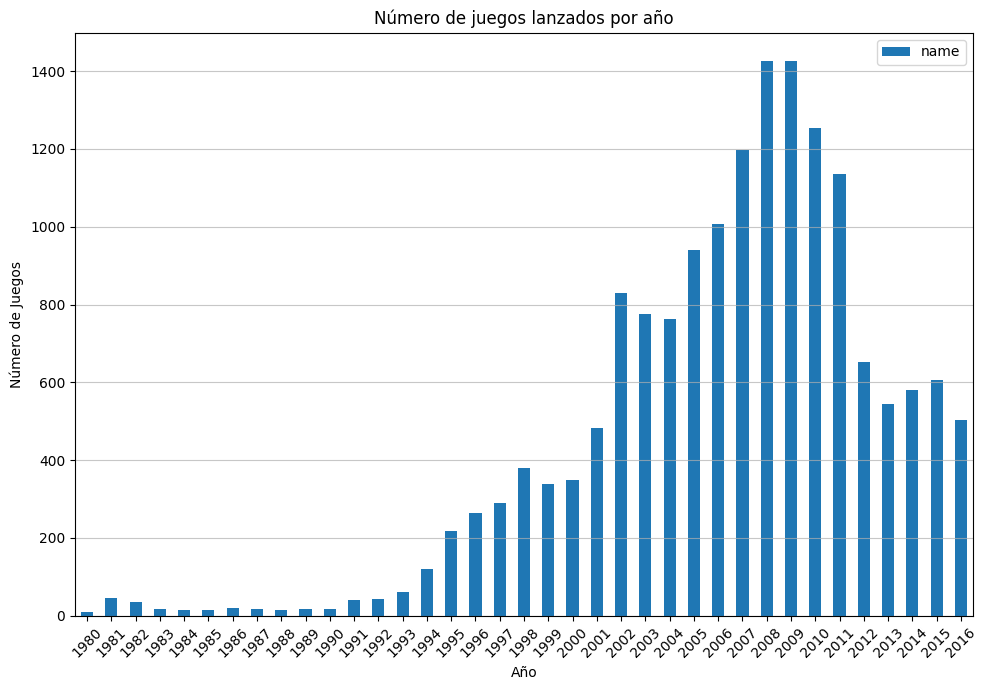

In [27]:
games_per_year = df_games.groupby('year_of_release')['name'].count().reset_index()

display(games_per_year)



games_per_year.plot(kind='bar', x = 'year_of_release', y = 'name', figsize=(10, 7))
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)  
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


En esta gráfica se observa que hay valores en el año cero, lo más probable es que se deba a un error, por lo que se el análisis se va a limitar desde el año 1980 hasta el 2016.

Entre los años 1980 y 1994 los datos no son relevantes, durante estos años los lanzamientos de juegos no sobre pasaron las 200 unidades. 

A partir del año 1995 se ve un rompimiento de la barrera de los 200 juegos lanzados y posteriormente tuvo un incremento exponencial hasta llegar a su valor máximo en durante los años 2008 y 2009, para después tener una caída, notandose más entre el año 2010 y 2011 en donde el lanzamiento de juegos se redujo casi a la mitad.

Esto se puede deber a que en dichos años a nivel mundial estaban ocurriendo lanzamientos importantes a nivel del internet, como las redes sociales por lo que podría haber opacado el lanzamiento de nuevos juegos.

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

<AxesSubplot:title={'center':'Ventas totales de cada plataforma'}, xlabel='Plataforma', ylabel='Total ventas'>

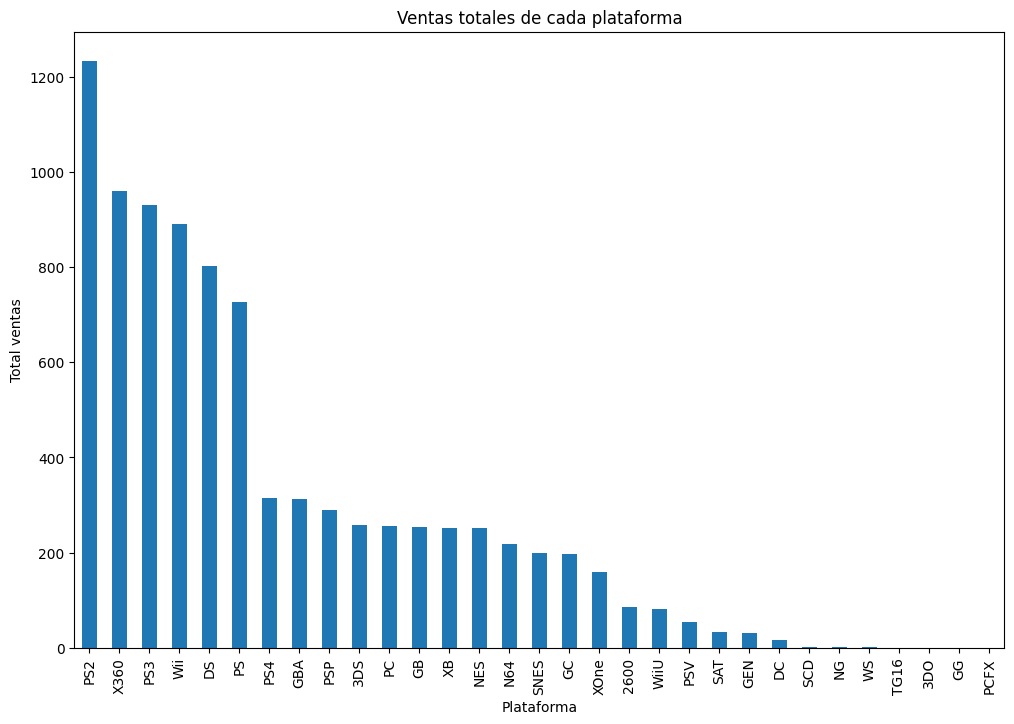

In [28]:
# Ventas totales en cada plataforma


df_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize=(12, 8), title = 'Ventas totales de cada plataforma',xlabel = 'Plataforma', ylabel = 'Total ventas' )

Del grafico se puede observar que la plataforma con mayor registro en cantidad de ventas fue el PS2, seguido del X360. 

In [29]:
# 5 plataformas con mayores ventas totales
total_sales_platform = df_games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
total_sales_platform = total_sales_platform.sort_values(by = 'total_sales', ascending = False).head(5)
display(total_sales_platform)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [30]:
# Distribución basada en los datos de cada año
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
df_games_2 = df_games[df_games['platform'].isin(platform_list)]
df_games_2['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2'], dtype=object)

In [31]:
platform_list = df_games_2.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
platform_list.head()

,year_of_release,platform,total_sales
0,1985,DS,0.02
1,2000,PS2,39.17
2,2001,PS2,166.43
3,2002,PS2,205.38
4,2003,PS2,184.31


<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

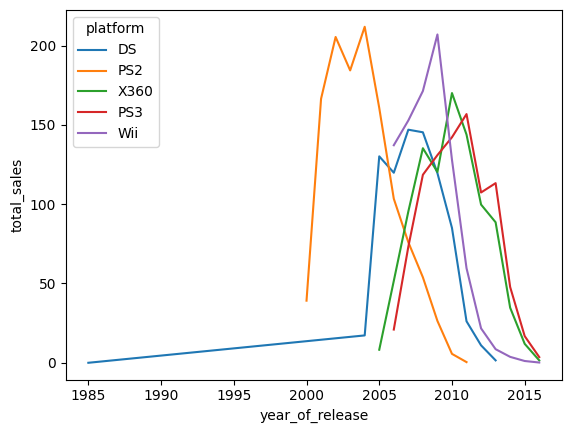

In [32]:
sns.lineplot(data = platform_list, hue = 'platform', x = 'year_of_release', y = 'total_sales')

- Los años entre 1985 y 2000 no son relevantes puesto que no hay datos de las otras consolas
- Las nuevas plataformas tardan en promedio entre 3 y 5 años entre una plataforma y la otra
- Se puede observar que una de las plataformas que solía ser popular durante los años del 2006 al 2009 era el Wii, sin embargo en los últimos años no presenta ventas significativas, al igual que el DS y el PS3

In [33]:
# Años que tardan las consolas en aparecer y desaparecer
platform_list_2 = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

platform_years_list = []

# Años que tardan las consolas en aparecer y desaparecer
for platform in platform_list_2:
    platform_data = df_games[df_games['platform'] == platform]
    
    first_year = platform_data['year_of_release'].min()
    last_year = platform_data['year_of_release'].max()
    
    # Calcular años en el mercado
    years_on_market = last_year - first_year 
    
    # Agregar los resultados a la lista
    platform_years_list.append({'Platform': platform,
                                'First_Year': first_year,
                                'Last_Year': last_year,
                                'Years_On_Market': years_on_market})

# Convertir la lista en un DataFrame
df_platform_years = pd.DataFrame(platform_years_list)

# Mostrar los resultados
display(df_platform_years)
    

,Platform,First_Year,Last_Year,Years_On_Market
0,PS2,2000,2011,11
1,X360,2005,2016,11
2,PS3,2006,2016,10
3,Wii,2006,2016,10
4,DS,1985,2013,28


Con estos datos y la grafica anterior se puede concluir que la mayoria de plataformas una vez son lanzadas y llegan a su pico en 5 años aproximadamente y desaparecen a los 5 años, se podría tomar un valor entre 3 y 5 años

In [34]:
  platform_years_list.append({'Platform': platform,
                                'First_Year': first_year,
                                'Last_Year': last_year,
                                'Years_On_Market': years_on_market})
    
# Construir el DataFrame a partir de la lista de resultados
platform_years = pd.DataFrame(platform_years_list)

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Según lo anterior se deben de tener en cuenta los últimos 5 años, por lo que sería el periodo del 2012 al 2016

#### Filtrar datos para trabajar solo con los últimos 5 años

In [35]:
# Filtrar datos para trabajar solo con los últimos 5 años

df_games_5_years = df_games[df_games['year_of_release'] >= 2011][['platform', 'total_sales', 'year_of_release', 'name', 'user_score', 'critic_score', 'genre', 'rating', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']].sort_values(by = 'total_sales', ascending = False)

display(df_games_5_years)


,platform,total_sales,year_of_release,name,user_score,critic_score,genre,rating,eu_sales,jp_sales,na_sales,other_sales
16,PS3,21.05,2013,Grand Theft Auto V,8.2,97.0,Action,M,9.09,0.98,7.02,3.96
23,X360,16.27,2013,Grand Theft Auto V,8.1,97.0,Action,M,5.14,0.06,9.66,1.41
29,X360,14.73,2011,Call of Duty: Modern Warfare 3,3.4,88.0,Shooter,M,4.24,0.13,9.04,1.32
31,PS4,14.63,2015,Call of Duty: Black Ops 3,NaN,NaN,Shooter,NaN,5.86,0.36,6.03,2.38
33,3DS,14.60,2013,Pokemon X/Pokemon Y,NaN,NaN,Role-Playing,NaN,4.19,4.35,5.28,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...
16265,PSP,0.01,2012,Ouka Sengoku Portable,NaN,NaN,Adventure,NaN,0.00,0.01,0.00,0.00
16267,WiiU,0.01,2016,The Book of Unwritten Tales 2,NaN,NaN,Adventure,T,0.01,0.00,0.00,0.00
16268,PC,0.01,2011,Dark Parables: The Exiled Prince,NaN,NaN,Puzzle,E10+,0.01,0.00,0.00,0.00
16270,PSV,0.01,2015,Hyakka Yakou,NaN,NaN,Action,NaN,0.00,0.01,0.00,0.00


### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

#### 5 plataformas con mayores ventas totales

In [36]:
# 5 plataformas con mayores ventas totales
total_sales_platform_5_years = df_games_5_years.groupby('platform')[['total_sales', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']].sum().reset_index()

top_platform_5_years = total_sales_platform_5_years.head(5).sort_values(by = 'total_sales', ascending = False)

display(top_platform_5_years)

,platform,total_sales,eu_sales,jp_sales,na_sales,other_sales
4,PS3,445.57,163.10,49.39,168.26,64.82
0,3DS,257.81,61.27,100.62,82.65,13.27
2,PC,97.68,56.70,0.00,29.88,11.10
1,DS,38.73,9.24,8.04,18.86,2.59
3,PS2,0.45,0.13,0.09,0.13,0.10


<AxesSubplot:title={'center':'Ventas totales de cada plataforma en los últimos años'}, xlabel='Plataforma', ylabel='Total ventas'>

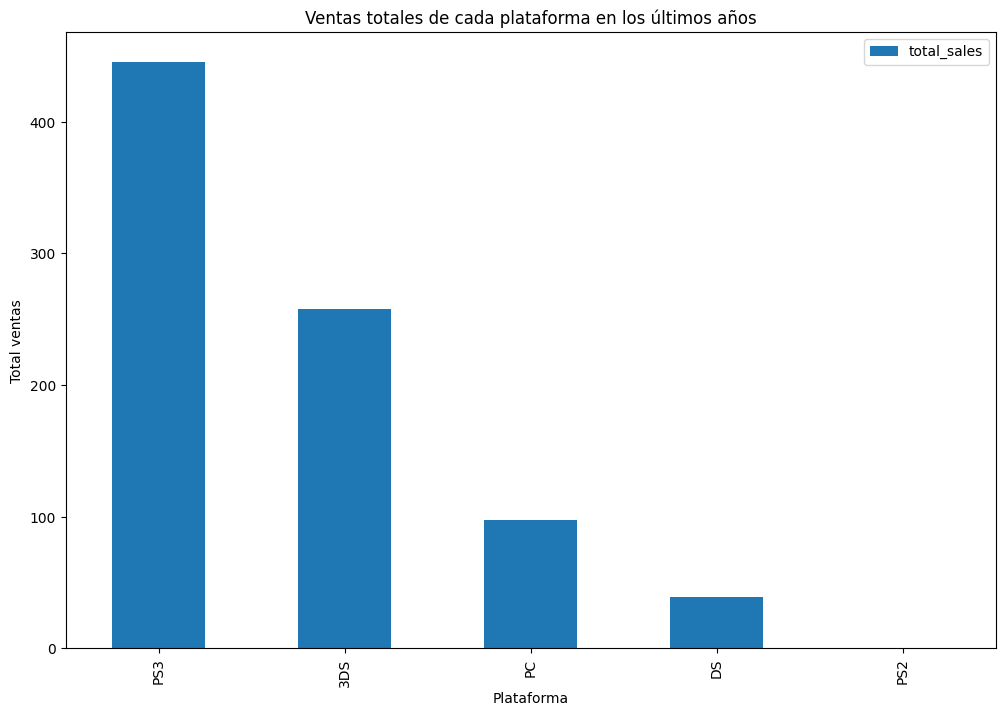

In [37]:
top_platform_5_years.plot(kind = 'bar', figsize=(12, 8), title = 'Ventas totales de cada plataforma en los últimos años', x = 'platform', y= 'total_sales' ,xlabel = 'Plataforma', ylabel = 'Total ventas')

PS3, X360, PS4, 3DS y XOne han sido las plataformas lideres en ventas durante los últimos 5 años. Por lo que dichas plataformas son ptencialmente rentables, principalmente PS3

### ¿Cuáles crecen y cuáles se reducen?

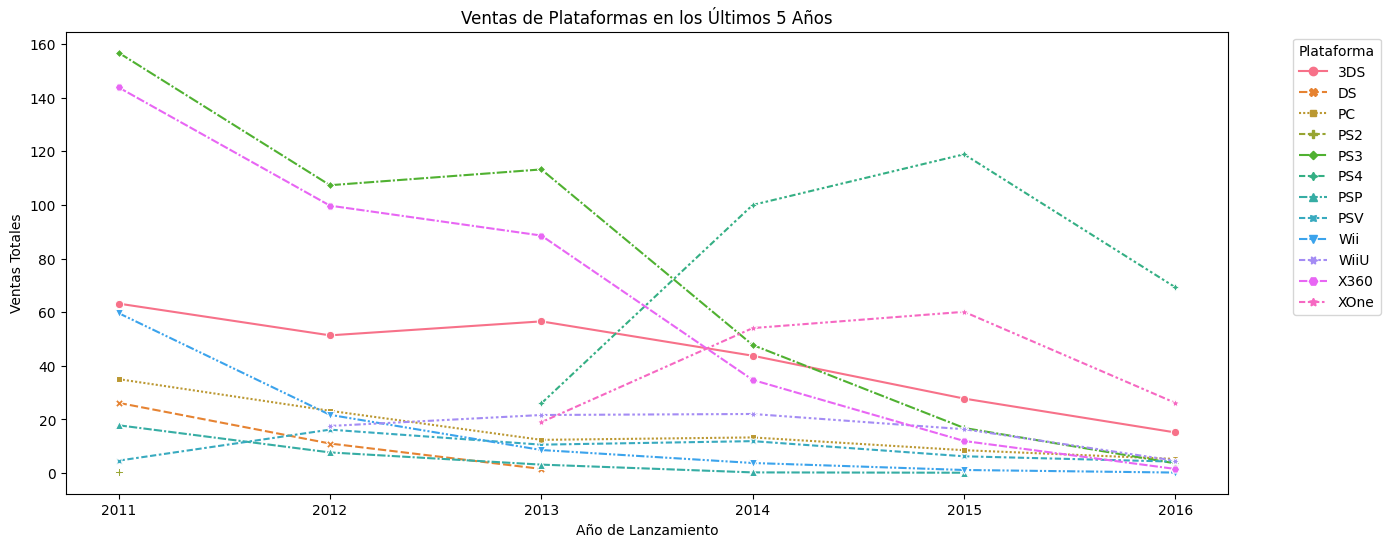

In [38]:
# Comparar las ventas de estas plataformas en diferentes años para determinar su crecimiento o reducción
sales_over_time_5_years = df_games_5_years.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Trazar las ventas en un gráfico de líneas
plt.figure(figsize=(15, 6))
sns.lineplot(data=sales_over_time_5_years, markers=True)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title('Ventas de Plataformas en los Últimos 5 Años')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Se puede observar que la mayoría de plataformas están llegando a su pico más bajo para el 2016, excepto XOne, PSP y 3DS que aunque no tuvieron las ventas más altas en los últimos 5 años, aún siguen vigentes y no han llegado a su punto bajo, como PS3 que tuvo las mayores ventas, pero hacia el año 2016 ya se observa una gran decadencia.

Por lo que las plataformas rentables podrían ser, el top de las 5 con mayores ventas: PS3, X360, PS4, 3DS y XOne.
- PS3
- X360
- PS4
- 3DS
- XOne

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Vamos a seguir trabajando con las plataformas más rentables en los últimos 5 años, que además aún no han llegado a su punto más bajo, es decir plataformas desde el periodo 2012 a 2016 con las siguientes plataformas:

- PS3
- X360
- PS4
- 3DS
- XOne

In [39]:
# Distribución basada en los datos de cada año
df_games_3 = df_games_5_years[df_games_5_years['platform'].isin(top_platform_5_years['platform'])]
df_games_3['platform'].unique()

df_games_3_platform_sales = df_games_3.groupby('platform')['total_sales'].sum()

print(df_games_3_platform_sales)

platform
3DS    257.81
DS      38.73
PC      97.68
PS2      0.45
PS3    445.57
Name: total_sales, dtype: float64


<AxesSubplot:xlabel='total_sales', ylabel='platform'>

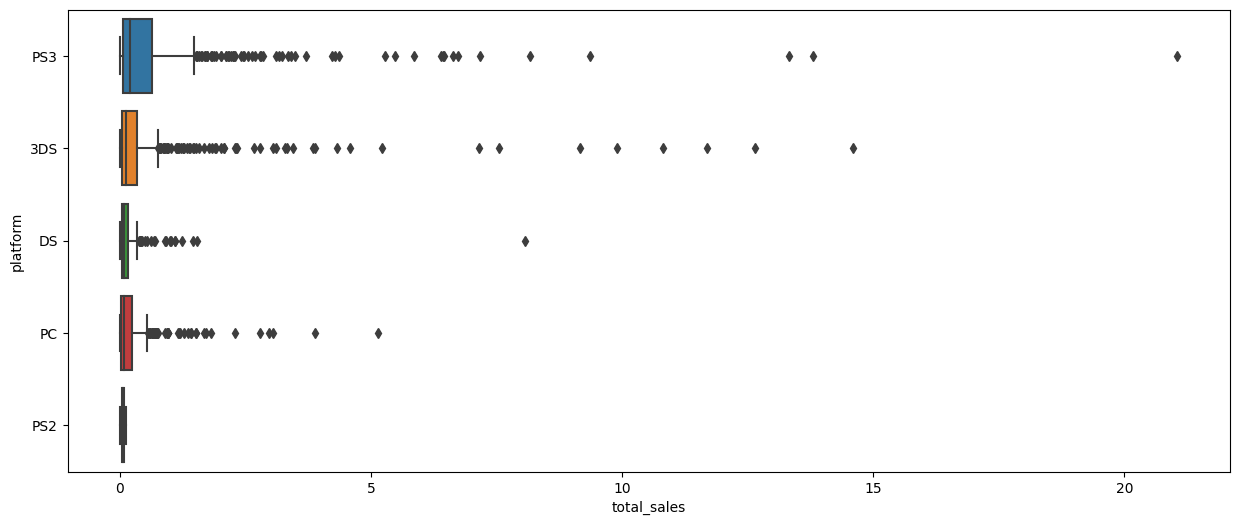

In [40]:
plt.figure(figsize=(15, 6))
sns.boxplot(data = df_games_3, x = 'total_sales', y = 'platform' )

Hay datos atipicos en la parte derecha del gráfico, por lo que debemos crear un diagrama de caja sin estos valores atipicos.

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

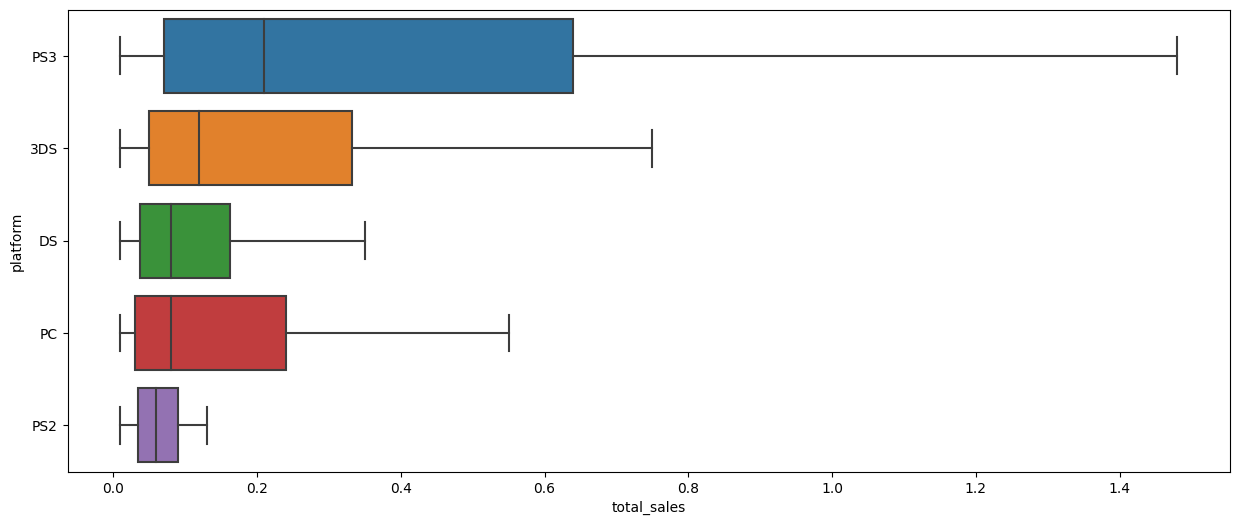

In [41]:
plt.figure(figsize=(15, 6))
sns.boxplot(data = df_games_3, x = 'total_sales', y = 'platform', showfliers = False )

Al usar showfliers = False lo que hace es generar el diagrama de caja sin considerar los valores atipicos

Analizando lo que el diagrama de caja nos dice para cada plataforma:

- PS3

El valor mínimo es igual a 0 milones de ventas de ventas totales de la plataforma. Se encuentra al final del bigote izquierdo.

Primer cuartil Q1: 0.1 Millones de ventas totales de la plataforma.

Segundo cuartil Q2 o mediana: 0.2 Millones de ventas totales de la plataforma.

Tercer cuartil Q3: 0.62 millones de ventas totales de la plataforma.

El máximo es igual a 1.5 millones de ventas totales de la plataforma. Se encuentra al final del bigote derecho.

La distancia entre Q1 y Q3 se denomina intervalo intercuartílico (o IQR). Mide la dispersión de los datos situados en la mitad central. En otras palabras, es el intervalo del 50% medio de la muestra.

Q3 - Q1 = 0.52 millones de ventas totales de la plataforma.


La mediana de las ventas totales de la plataforma PS3 es de 0.2 millones de dólares, lo que significa que el 50% de los datos se encuentran por encima de este valor y el otro 50% por debajo.

El primer cuartil (Q1) indica que el 25% de las ventas totales están por debajo de 0.05 millones de dólares.

El tercer cuartil (Q3) indica que el 75% de las ventas totales están por debajo de 0.6 millones de dólares.

El rango intercuartílico (IQR) es de 0.52 millones de dólares, lo que sugiere que hay una dispersión significativa en las ventas totales de la plataforma PS3.

No hay valores atípicos por encima del máximo, que es de 1.5 millones de dólares.

Esto sugiere que las ventas pueden variar significativamente entre los diferentes juegos de la plataforma.




- 3DS

El valor mínimo es igual a 0 milones de ventas de ventas totales de la plataforma. Se encuentra al final del bigote izquierdo.

Primer cuartil Q1: 0.06 Millones de ventas totales de la plataforma.

Segundo cuartil Q2 o mediana: 0.12 Millones de ventas totales de la plataforma.

Tercer cuartil Q3: 0.32 millones de ventas totales de la plataforma.

El máximo es igual a 0.75 millones de ventas totales de la plataforma. Se encuentra al final del bigote derecho.

La distancia entre Q1 y Q3 se denomina intervalo intercuartílico (o IQR). Mide la dispersión de los datos situados en la mitad central. En otras palabras, es el intervalo del 50% medio de la muestra.

Q3 - Q1 = 0.69 millones de ventas totales de la plataforma.


La mediana de las ventas totales de la plataforma 3DS es de 0.12 millones de dólares, lo que significa que el 50% de los datos se encuentran por encima de este valor y el otro 50% por debajo.

El primer cuartil (Q1) indica que el 25% de las ventas totales están por debajo de 0.06 millones de dólares.

El tercer cuartil (Q3) indica que el 75% de las ventas totales están por debajo de 0.32 millones de dólares.

El rango intercuartílico (IQR) es de 0.69 millones de dólares, lo que indica que hay una dispersión considerable en las ventas totales de la plataforma 3DS.

No hay valores atípicos por encima del máximo, que es de 0.75 millones de dólares.

Esto indica que las ventas pueden variar significativamente entre los diferentes juegos de la plataforma.


- DS

El valor mínimo es igual a 0 milones de ventas de ventas totales de la plataforma. Se encuentra al final del bigote izquierdo.

Primer cuartil Q1: 0.04 Millones de ventas totales de la plataforma.

Segundo cuartil Q2 o mediana: 0.09 Millones de ventas totales de la plataforma.

Tercer cuartil Q3: 0.19 millones de ventas totales de la plataforma.

El máximo es igual a 0.35 millones de ventas totales de la plataforma. Se encuentra al final del bigote derecho.

La distancia entre Q1 y Q3 se denomina intervalo intercuartílico (o IQR). Mide la dispersión de los datos situados en la mitad central. En otras palabras, es el intervalo del 50% medio de la muestra.

Q3 - Q1 = 0.31 millones de ventas totales de la plataforma.

El valor mínimo de las ventas totales es 0 millones de dólares, lo que indica que hay juegos que no han generado ventas para esta plataforma.

La mediana de las ventas totales es de 0.09 millones de dólares, lo que sugiere que el 50% de los datos están por encima de este valor y el otro 50% por debajo.

El primer cuartil (Q1) indica que el 25% de las ventas totales están por debajo de 0.04 millones de dólares.

El tercer cuartil (Q3) indica que el 75% de las ventas totales están por debajo de 0.19 millones de dólares.

El rango intercuartílico (IQR) es de 0.31 millones de dólares, lo que muestra una dispersión moderada en las ventas totales de la plataforma DS.

No hay valores atípicos por encima del máximo, que es de 0.35 millones de dólares.

as ventas pueden variar entre los diferentes juegos de la plataforma, pero en general, las ventas tienden a ser bajas en comparación con otras plataformas.

- PC

El valor mínimo es igual a 0 milones de ventas de ventas totales de la plataforma. Se encuentra al final del bigote izquierdo.

Primer cuartil Q1: 0.03 Millones de ventas totales de la plataforma.

Segundo cuartil Q2 o mediana: 0.09 Millones de ventas totales de la plataforma.

Tercer cuartil Q3: 0.25 millones de ventas totales de la plataforma.

El máximo es igual a 0.55 millones de ventas totales de la plataforma. Se encuentra al final del bigote derecho.

La distancia entre Q1 y Q3 se denomina intervalo intercuartílico (o IQR). Mide la dispersión de los datos situados en la mitad central. En otras palabras, es el intervalo del 50% medio de la muestra.

Q3 - Q1 = 0.22 millones de ventas totales de la plataforma.

El valor mínimo de las ventas totales es 0 millones de dólares, lo que indica que hay juegos que no han generado ventas para esta plataforma.

La mediana de las ventas totales es de 0.09 millones de dólares, lo que sugiere que el 50% de los datos están por encima de este valor y el otro 50% por debajo.

El primer cuartil (Q1) indica que el 25% de las ventas totales están por debajo de 0.03 millones de dólares.

El tercer cuartil (Q3) indica que el 75% de las ventas totales están por debajo de 0.25 millones de dólares.

El rango intercuartílico (IQR) es de 0.22 millones de dólares, lo que muestra una dispersión moderada en las ventas totales de la plataforma DS.

No hay valores atípicos por encima del máximo, que es de 0.55 millones de dólares.

Estos datos indican que la plataforma DS tiene una variabilidad significativa en sus ventas totales, con una mediana relativamente baja y un rango intercuartílico moderado


- PS2

El valor mínimo es igual a 0 milones de ventas de ventas totales de la plataforma. Se encuentra al final del bigote izquierdo.

Primer cuartil Q1: 0.04 Millones de ventas totales de la plataforma.

Segundo cuartil Q2 o mediana: 0.08 Millones de ventas totales de la plataforma.

Tercer cuartil Q3: 0.1 millones de ventas totales de la plataforma.

El máximo es igual a 0.15 millones de ventas totales de la plataforma. Se encuentra al final del bigote derecho.

La distancia entre Q1 y Q3 se denomina intervalo intercuartílico (o IQR). Mide la dispersión de los datos situados en la mitad central. En otras palabras, es el intervalo del 50% medio de la muestra.

Q3 - Q1 = 0.06 millones de ventas totales de la plataforma.

El valor mínimo de las ventas totales es 0 millones de dólares, lo que indica que hay juegos que no han generado ventas para esta plataforma.

La mediana de las ventas totales es de 0.08 millones de dólares, lo que sugiere que el 50% de los datos están por encima de este valor y el otro 50% por debajo.

El primer cuartil (Q1) indica que el 25% de las ventas totales están por debajo de 0.04 millones de dólares.

El tercer cuartil (Q3) indica que el 75% de las ventas totales están por debajo de 0.1 millones de dólares.

El rango intercuartílico (IQR) es de 0.06 millones de dólares, lo que muestra una dispersión moderada en las ventas totales de la plataforma PS2.

No hay valores atípicos por encima del máximo, que es de 0.15 millones de dólares.

Estos datos sugieren que las ventas totales de la plataforma PS2 tienden a ser relativamente bajas, con una mediana y un tercer cuartil bastante bajos. La dispersión de las ventas también es moderada, lo que indica cierta consistencia en el rendimiento de los juegos de esta plataforma.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Vamos a analizar como el user score y el critic score afectan las ventas de la plataforma PS3

,platform,total_sales,year_of_release,name,user_score,critic_score,genre,rating,eu_sales,jp_sales,na_sales,other_sales
16,PS3,21.05,2013,Grand Theft Auto V,8.2,97.0,Action,M,9.09,0.98,7.02,3.96
34,PS3,13.79,2012,Call of Duty: Black Ops II,5.3,83.0,Shooter,M,5.73,0.65,4.99,2.42
37,PS3,13.33,2011,Call of Duty: Modern Warfare 3,3.2,88.0,Shooter,M,5.73,0.49,5.54,1.57
69,PS3,9.36,2013,Call of Duty: Ghosts,2.6,71.0,Shooter,M,3.63,0.38,4.10,1.25
81,PS3,8.17,2012,FIFA Soccer 13,6.6,88.0,Action,E,5.01,0.13,1.06,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...
16319,PS3,0.01,2011,Resistance Dual Pack,NaN,NaN,Shooter,M,0.01,0.00,0.00,0.00
16355,PS3,0.01,2014,Strider (2014),NaN,NaN,Platform,NaN,0.00,0.01,0.00,0.00
16364,PS3,0.01,2015,Nitroplus Blasterz: Heroines Infinite Duel,NaN,NaN,Fighting,T,0.00,0.01,0.00,0.00
16230,PS3,0.01,2012,Madden NFL 13,5.5,83.0,Sports,E,0.01,0.00,0.00,0.00


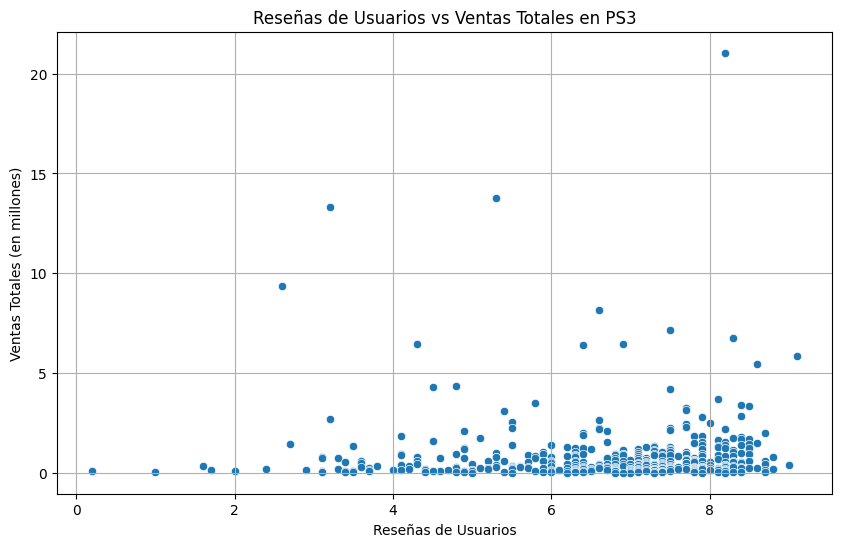

Correlación entre las reseñas de usuarios, reseñas de profesionales y ventas totales:
              user_score  critic_score  total_sales
user_score      1.000000      0.563315     0.014089
critic_score    0.563315      1.000000     0.380111
total_sales     0.014089      0.380111     1.000000


In [42]:
# Plataforma seleccionada
platform = 'PS3'

df_platform = df_games_5_years[df_games_5_years['platform'] == platform]

display(df_platform)

# Gráfico de dispersión para las reseñas de usuarios vs ventas totales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_platform, x='user_score', y='total_sales')
plt.title(f'Reseñas de Usuarios vs Ventas Totales en {platform}')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales (en millones)')
plt.grid(True)
plt.show()

# Correlación entre las reseñas de usuarios, las reseñas de profesionales y las ventas totales
correlation = df_platform[['user_score', 'critic_score', 'total_sales']].corr()
print("Correlación entre las reseñas de usuarios, reseñas de profesionales y ventas totales:")
print(correlation)

El gráfico de dispersión muestra la relación entre las reseñas de usuarios y las ventas totales de juegos para la plataforma PS3. Cada punto representa un juego, donde el eje x representa las reseñas de usuarios y el eje y representa las ventas totales en millones. Se eligío esta plataforma, dado que es la que presenta un mayor número de ventas totales en los últimos 4 años.

No parece haber una correlación evidente entre las reseñas de usuarios y las ventas totales. Los puntos están dispersos por todo el gráfico, lo que sugiere que las reseñas de usuarios no son un indicador directo de las ventas de un juego.

La correlación entre las reseñas de usuarios y las ventas totales es muy baja, con un valor de 0.014. Esto confirma que no hay una relación significativa entre estas dos variables. Por otro lado, la correlación entre las reseñas de usuarios y las reseñas de profesionales (critic_score) es moderada, con un valor de 0.563, lo que indica una relación algo más fuerte entre estas dos variables.

En resumen, basándonos en este análisis, parece que las reseñas de usuarios no son un factor determinante en las ventas totales de los juegos para la plataforma PS3. Otros factores, como la calidad del juego, la publicidad y la popularidad de la franquicia, pueden tener un impacto mucho mayor en las ventas.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

,platform,total_sales,year_of_release,name,user_score,critic_score,genre,rating,eu_sales,jp_sales,na_sales,other_sales
23,X360,16.27,2013,Grand Theft Auto V,8.1,97.0,Action,M,5.14,0.06,9.66,1.41
29,X360,14.73,2011,Call of Duty: Modern Warfare 3,3.4,88.0,Shooter,M,4.24,0.13,9.04,1.32
31,PS4,14.63,2015,Call of Duty: Black Ops 3,NaN,NaN,Shooter,NaN,5.86,0.36,6.03,2.38
35,X360,13.68,2012,Call of Duty: Black Ops II,4.8,83.0,Shooter,M,4.24,0.07,8.25,1.12
42,PS4,12.62,2014,Grand Theft Auto V,8.3,97.0,Action,M,6.31,0.38,3.96,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...
16312,Wii,0.01,2015,Monster High: New Ghoul in School,NaN,NaN,Action,E,0.01,0.00,0.00,0.00
16323,PSV,0.01,2016,Samurai Warriors: Sanada Maru,NaN,NaN,Action,NaN,0.00,0.01,0.00,0.00
16334,3DS,0.01,2011,Order Up!!,NaN,NaN,Action,NaN,0.01,0.00,0.00,0.00
16359,Wii,0.01,2012,Captain Morgane and the Golden Turtle,NaN,NaN,Adventure,NaN,0.01,0.00,0.00,0.00


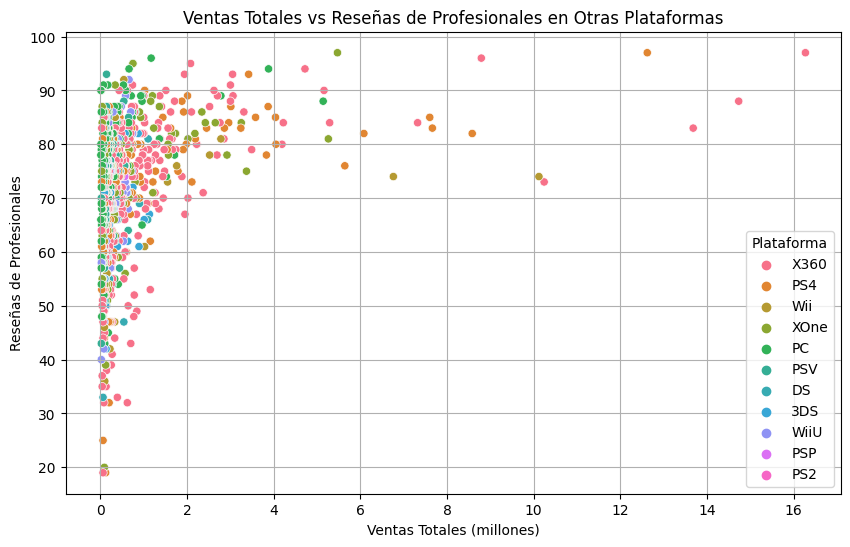

              total_sales  critic_score
total_sales      1.000000      0.322039
critic_score     0.322039      1.000000


In [43]:
games_selected = df_games_5_years[df_games_5_years['platform'] == platform]['name'].unique()

other_platforms_data = df_games_5_years[(df_games_5_years['name'].isin(games_selected)) & (df_games_5_years['platform'] != platform)]

display(other_platforms_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=other_platforms_data, x='total_sales', y='critic_score', hue='platform')
plt.title('Ventas Totales vs Reseñas de Profesionales en Otras Plataformas')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Reseñas de Profesionales')
plt.grid(True)
plt.legend(title='Plataforma')
plt.show()

correlation_name = other_platforms_data[['total_sales', 'critic_score' ]].corr()

print(correlation_name)

El gráfico de dispersión muestra la relación entre las ventas totales de los juegos y las reseñas de profesionales (critic_score) para todas las plataformas excepto PS3. Cada punto representa un juego, donde el eje X representa las ventas totales en millones y el eje Y representa las reseñas de profesionales.

A partir del gráfico se pude inferir que hay una correlación moderada entre las ventas totales y las reseñas de profesionales. Los puntos tienden a agruparse hacia arriba a la derecha del gráfico, lo que sugiere que los juegos con reseñas de profesionales más altas tienden a tener mayores ventas totales.

La correlación entre las ventas totales y las reseñas de profesionales es de aproximadamente 0.322, lo que indica una relación positiva pero moderada entre estas dos variables. Esto sugiere que, en general, los juegos con mejores reseñas de profesionales tienden a vender más, pero también hay otros factores que influyen en las ventas totales.

A diferencia de lo analizado anteriormente con la plataforma PS3 entre las ventas totales y la critica de los ususarios, acá se evidencia que hay mayor correlación entre las ventas totales y la reseña de los criticos (critic_score).

Lo que indica que tendría mayor influencia en general la critica de los profesionales que la de lo

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [44]:
game_genre = df_games_5_years.groupby('genre')['total_sales'].sum().sort_values(ascending=False)


display(game_genre)

genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sales, dtype: float64

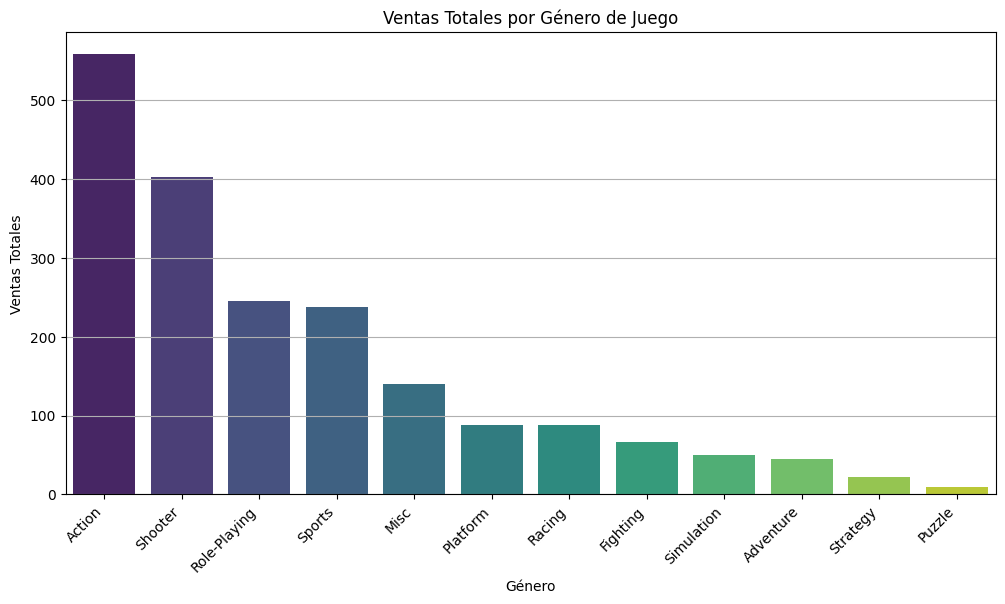

Géneros con las ventas más altas:
genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Name: total_sales, dtype: float64

Géneros con las ventas más bajas:
genre
Fighting      66.90
Simulation    50.26
Adventure     45.04
Strategy      22.16
Puzzle         9.85
Name: total_sales, dtype: float64


In [45]:
# Visualizar la distribución de las ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(x=game_genre.index, y=game_genre.values, palette='viridis')
plt.title('Ventas Totales por Género de Juego')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Imprimir los géneros con las ventas más altas y más bajas
print("Géneros con las ventas más altas:")
print(game_genre.head())

print("\nGéneros con las ventas más bajas:")
print(game_genre.tail())

Al observar la distribución de los juegos por género y sus ventas totales, podemos notar que los géneros más rentables son Action, Shooter, Role-Playing, Sports y Misc, que son los que tienen las ventas más altas. Estos géneros suelen ser populares entre los jugadores y a menudo incluyen títulos de franquicias conocidas y de gran presupuesto.

Por otro lado, los géneros con ventas más bajas son Fighting, Simulation, Adventure, Strategy y Puzzle. Estos géneros pueden no ser tan populares como los mencionados anteriormente o pueden tener una base de fans más pequeña. Además, es posible que algunos de estos géneros requieran un enfoque más específico y nicho, lo que limita su alcance y potencial de ventas.

En general, los géneros más rentables tienden a ser aquellos que atraen a una amplia audiencia y ofrecen experiencias de juego emocionantes e inmersivas. Por otro lado, los géneros con ventas más bajas pueden tener un atractivo más limitado o enfrentar una mayor competencia en el mercado. Sin embargo, es importante tener en cuenta que el éxito de un juego no depende únicamente de su género, sino también de otros factores como la calidad del juego, la comercialización y la recepción de los jugadores.

## Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [46]:
market_sales = top_platform_5_years.groupby('platform').agg({
    'na_sales':'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum'
    
}).reset_index()

display(market_sales)



,platform,na_sales,eu_sales,jp_sales,other_sales
0,3DS,82.65,61.27,100.62,13.27
1,DS,18.86,9.24,8.04,2.59
2,PC,29.88,56.70,0.00,11.10
3,PS2,0.13,0.13,0.09,0.10
4,PS3,168.26,163.10,49.39,64.82


In [47]:
market_sales = pd.melt(market_sales, id_vars = ['platform'], 
                       value_vars = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                       var_name = 'market', 
                       value_name = 'sales')

display(market_sales)

,platform,market,sales
0,3DS,na_sales,82.65
1,DS,na_sales,18.86
2,PC,na_sales,29.88
3,PS2,na_sales,0.13
4,PS3,na_sales,168.26
5,3DS,eu_sales,61.27
6,DS,eu_sales,9.24
7,PC,eu_sales,56.70
8,PS2,eu_sales,0.13
9,PS3,eu_sales,163.10


<AxesSubplot:xlabel='market', ylabel='sales'>

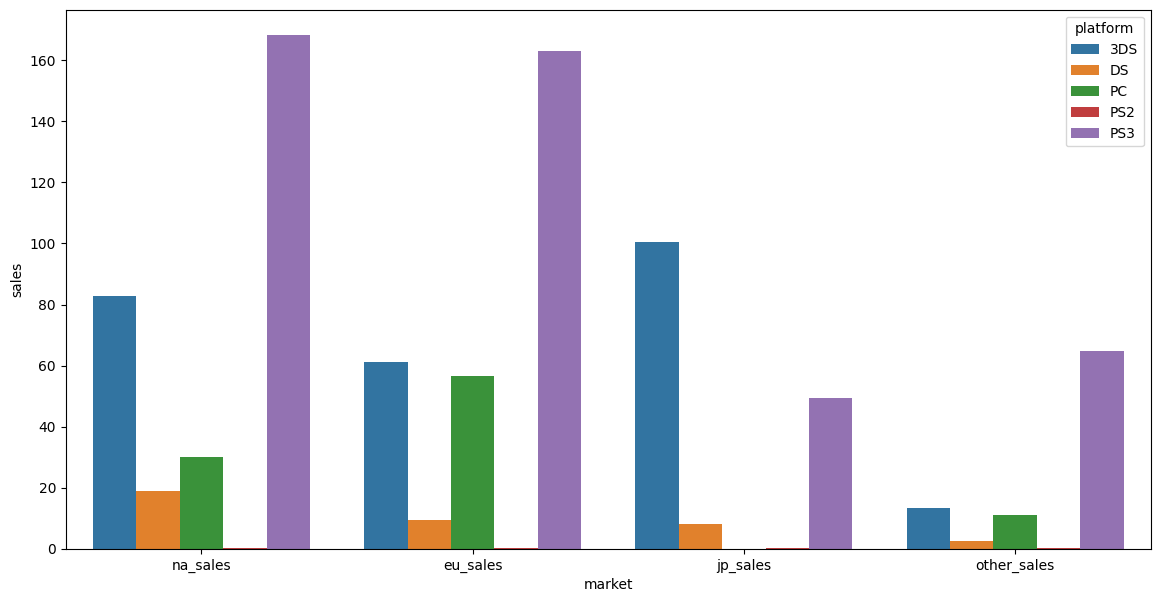

In [48]:
plt.figure(figsize=(14, 7))
sns.barplot(data = market_sales, x = 'market', y = 'sales', hue = 'platform')

- NA (América del Norte):

PS3 - 168.26 millones de ventas

3DS - 82.65 millones de ventas

PC - 29.88 millones de ventas

DS - 18.86 millones de ventas

Other - 13.27 millones de ventas

La plataforma PS3 lidera en ventas, seguida de 3DS y PC. DS y PS2 tienen ventas significativamente más bajas en esta región.

- EU (Europa):

PS3 - 163.10 millones de ventas

3DS - 61.27 millones de ventas

PC - 56.70 millones de ventas

Other - 11.10 millones de ventas

DS - 9.24 millones de ventas

En EU (Europa), PS3 también lidera en ventas, seguida de PC y 3DS. Similar a NA, DS y PS2 tienen ventas más bajas en EU.

- JP (Japón):

3DS - 100.62 millones de ventas

PS3 - 49.39 millones de ventas

Other - 13.27 millones de ventas

DS - 8.04 millones de ventas

PC - 0.00 millones de ventas

En JP (Japón), 3DS es la plataforma líder en ventas, seguida de PS3. PC tiene ventas muy bajas en JP, y DS y PS2 tienen ventas aún más bajas.


Podemos observar que las plataformas líderes varían entre las regiones, sobre todo entre Europra y America del Norte con Japón; en donde Europa y Norte America tienen las mismas plataformas líderes con algunas variaciones en la cantidad de ventas, mientras que en Japón su plataforma líder es la segunda para Europa y Norte America y PS3 tiene menos de la mitad de las ventas a comparación de las que tiene en EU y NA. 

Por ejemplo, PS3 es líder en ventas en NA y EU, mientras que 3DS lidera en JP. Esto sugiere que las preferencias de los jugadores pueden diferir según la región, posiblemente debido a factores como la disponibilidad de juegos exclusivos, preferencias culturales y diferencias en la popularidad de las plataformas en cada región.

Ahora, para visualizar estas diferencias en las cuotas de mercado entre las regiones, podemos usar un gráfico de barras agrupado. El código que proporcionaste parece estar en el formato correcto para crear este gráfico. Solo necesitaríamos asegurarnos de que market_sales contenga los datos adecuados para las ventas en cada región y que los nombres de las plataformas sean legibles en el gráfico. Una vez que tengamos esos datos listos, podemos generar el gráfico usando Seaborn o cualquier otra biblioteca de visualización de datos que prefieras.

### Los cinco géneros principales. Explica la diferencia.

In [49]:

df_games_3 = df_games[df_games['year_of_release'] >= 2011][['total_sales', 'genre', 'rating', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']].sort_values(by = 'total_sales', ascending = False)

display(df_games_3)


# 5 generos con mayores ventas totales
total_genre_5_years = df_games_3.groupby('genre')[['total_sales','eu_sales', 'rating', 'jp_sales', 'na_sales', 'other_sales']].sum().reset_index()

top_genre_5_years = total_genre_5_years.head(5).sort_values(by = 'total_sales', ascending = False)

display(top_genre_5_years)

market_sales_2 = top_genre_5_years.groupby('genre').agg({
    'na_sales':'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum'
    
}).reset_index()

display(market_sales_2)

market_sales_2 = pd.melt(market_sales_2, id_vars = ['genre'], 
                       value_vars = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                       var_name = 'market', 
                       value_name = 'sales')

display(market_sales_2)

,total_sales,genre,rating,eu_sales,jp_sales,na_sales,other_sales
16,21.05,Action,M,9.09,0.98,7.02,3.96
23,16.27,Action,M,5.14,0.06,9.66,1.41
29,14.73,Shooter,M,4.24,0.13,9.04,1.32
31,14.63,Shooter,NaN,5.86,0.36,6.03,2.38
33,14.60,Role-Playing,NaN,4.19,4.35,5.28,0.78
...,...,...,...,...,...,...,...
16265,0.01,Adventure,NaN,0.00,0.01,0.00,0.00
16267,0.01,Adventure,T,0.01,0.00,0.00,0.00
16268,0.01,Puzzle,E10+,0.01,0.00,0.00,0.00
16270,0.01,Action,NaN,0.00,0.01,0.00,0.00


,genre,total_sales,eu_sales,jp_sales,na_sales,other_sales
0,Action,557.80,199.12,63.62,230.92,64.14
3,Misc,139.42,39.72,17.60,69.69,12.41
4,Platform,88.68,30.07,12.13,38.28,8.20
2,Fighting,66.90,16.24,12.38,31.63,6.65
1,Adventure,45.04,13.96,12.07,14.76,4.25


,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,230.92,199.12,63.62,64.14
1,Adventure,14.76,13.96,12.07,4.25
2,Fighting,31.63,16.24,12.38,6.65
3,Misc,69.69,39.72,17.60,12.41
4,Platform,38.28,30.07,12.13,8.20


,genre,market,sales
0,Action,na_sales,230.92
1,Adventure,na_sales,14.76
2,Fighting,na_sales,31.63
3,Misc,na_sales,69.69
4,Platform,na_sales,38.28
5,Action,eu_sales,199.12
6,Adventure,eu_sales,13.96
7,Fighting,eu_sales,16.24
8,Misc,eu_sales,39.72
9,Platform,eu_sales,30.07


<AxesSubplot:xlabel='market', ylabel='sales'>

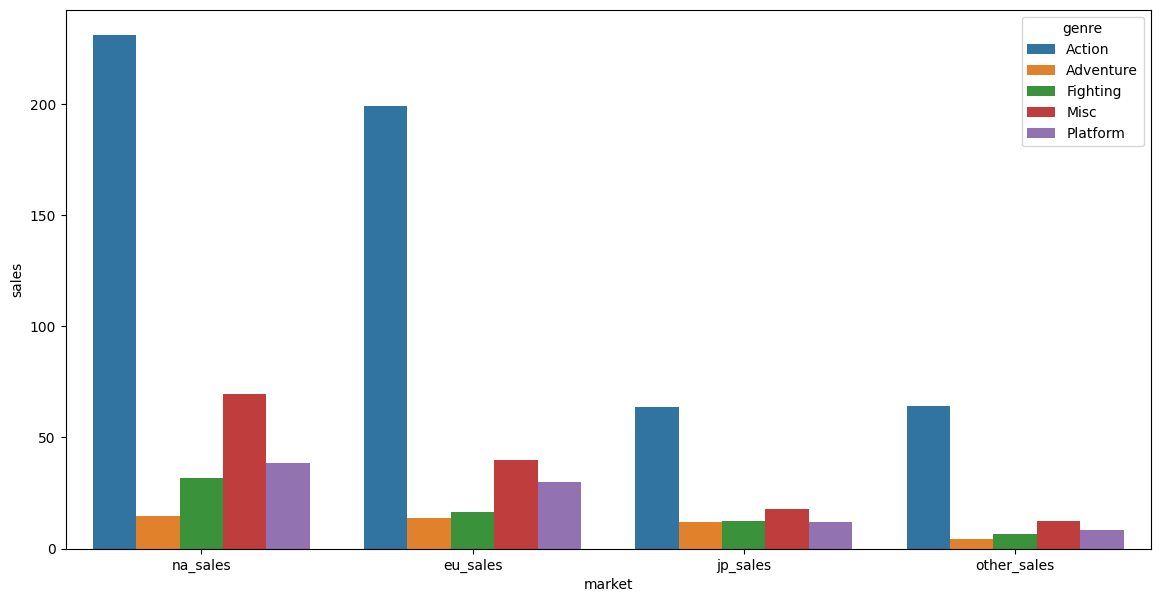

In [50]:
plt.figure(figsize=(14, 7))
sns.barplot(data = market_sales_2, x = 'market', y = 'sales', hue = 'genre')

El gráfico de barras muestra las ventas de los cinco géneros principales en las diferentes regiones.

- Action

Es el género más vendido en todas las regiones, con las ventas más altas en NA (Norte América) y EU (Europa).

- Adventure

Tiene ventas mucho más bajas en comparación con el género de Acción en todas las regiones, siendo más bajo en JP (Japón).

- Fighting

Tiene ventas más bajas en comparación con los géneros de Acción y Aventura en todas las regiones, con ventas más altas en NA.


- Misc

Tiene ventas más altas que Aventura y Lucha, pero aún inferiores a Acción en todas las regiones.

- Platform

Tiene ventas similares a las de Misc en NA y EU, pero ligeramente más bajas en JP.

El género de Action tiene la mayor cantidad de ventas en todas las regiones, seguido de Misc, mientras que Adventure, Fighting y Platform tienen ventas más bajas en comparación. Esta diferencia puede atribuirse a la popularidad de ciertos géneros en diferentes regiones, así como a la disponibilidad de juegos específicos de cada género en esas regiones.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [51]:
df_games_4 = df_games[df_games['year_of_release'] >= 2011][['total_sales', 'rating', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']].sort_values(by='total_sales', ascending=False)

total_esrb_5_years = df_games_4.groupby('rating', as_index=False)[['total_sales', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']].sum()

market_sales_3 = total_esrb_5_years.groupby('rating').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

market_sales_3 = pd.melt(market_sales_3, id_vars=['rating'], 
                         value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                         var_name='market', 
                         value_name='sales')

display(market_sales_3)

,rating,market,sales
0,E,na_sales,170.17
1,E10+,na_sales,117.72
2,EC,na_sales,0.42
3,M,na_sales,308.45
4,RP,na_sales,0.00
5,T,na_sales,109.31
6,E,eu_sales,141.73
7,E10+,eu_sales,78.00
8,EC,eu_sales,0.00
9,M,eu_sales,250.26


<AxesSubplot:xlabel='market', ylabel='sales'>

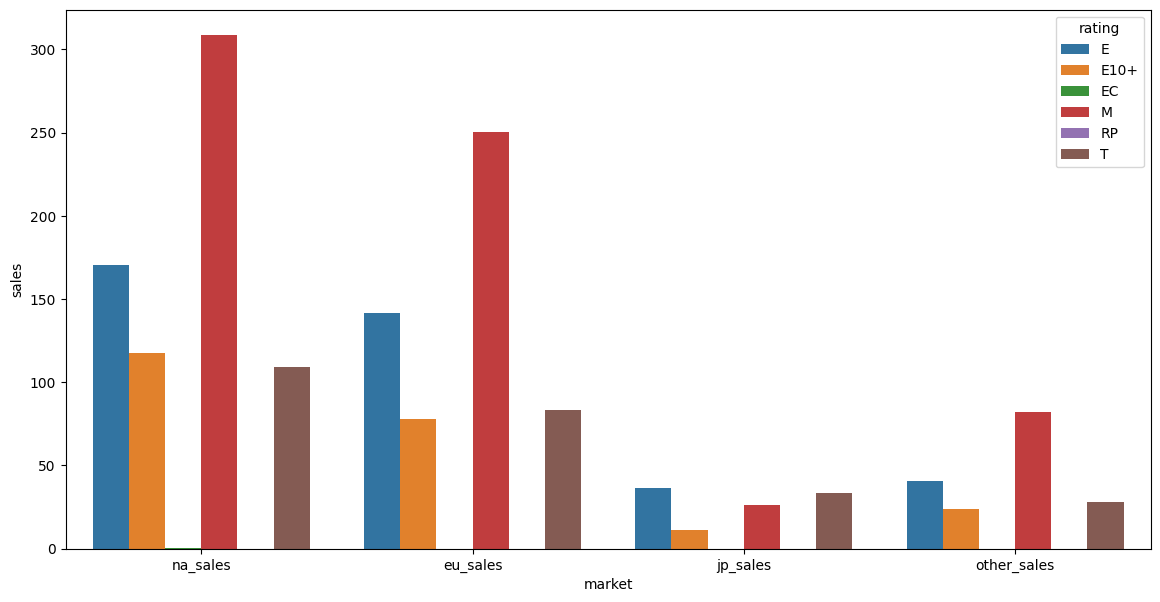

In [52]:
plt.figure(figsize=(14, 7))
sns.barplot(data = market_sales_3, x = 'market', y = 'sales', hue = 'rating')

El gráfico de barras muestra las ventas en diferentes regiones según las clasificaciones de la ESRB (Entertainment Software Rating Board)

E = Everyone

E10+ = Everyone 10 and older

EC = Early Childhood

M = Mature

RP = Rating Pending

T =Teen


- "E" (Everyone)

Tiene ventas más altas en NA (Norte América) y EU (Europa) en comparación con JP (Japón) y otras ventas.

- Clasificación "E10+" (Everyone 10 and older)

Tiene ventas más bajas en todas las regiones en comparación con la clasificación "E", pero aún así, muestra ventas significativas en NA y EU.

- Clasificación "EC" (Early Childhood)

Tiene ventas muy bajas en todas las regiones.

- Clasificación "M" (Mature) 

Tiene las ventas más altas en todas las regiones, especialmente en NA y EU.

- "RP" (Rating Pending)

Se considera un dato no relevnate, puesto que no se ha hecho la clasificación

- "T" (Teen)

Muestra ventas moderadas en todas las regiones, siendo más altas en NA y EU en comparación con JP y otras ventas.

la clasificación de la ESRB sí afecta a las ventas en regiones individuales. Las clasificaciones más altas, como "Mature", tienden a tener ventas más altas, mientras que las clasificaciones más bajas, como "Early Childhood", tienen ventas muy bajas. Esto sugiere que la clasificación de la ESRB puede influir en las decisiones de compra de los consumidores en diferentes regiones.

## Paso 5. Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [53]:
# Hipótesis nula H0 =  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
# Hipótesis alternativa = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
# alpha = 0.05 Voy a usar el nivel estandar
# Hipótesis sobre la igualdad de las medias de dos poblaciones
# Prueba estadística = Prueba ttest

# Hipotesis 1 = Calificaciones promedio por plataforma

df_games['platform'].unique()

score_xbox_one = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
score_pc = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(score_xbox_one, score_pc, equal_var = False)

print(f"""
      La calificación promedio de los ususarios para Xbox One es:{score_xbox_one.mean()} 
      La calificación promedio de los ususarios para PC es: {score_pc.mean()}
      
""""")


print('Valor p: ', results.pvalue)

# compara los valores p obtenidos con el nivel de significación estadística

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    


      La calificación promedio de los ususarios para Xbox One es:6.521428571428572 
      La calificación promedio de los ususarios para PC es: 7.065960264900661
      

Valor p:  4.5385802963771835e-06
Rechazamos la hipótesis nula


La prueba t de Student (t-test) se utilizó en este análisis para comparar las medias de dos muestras independientes: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC. Se optó por esta prueba estadística debido a que se estaban comparando dos grupos diferentes y se quería determinar si las diferencias observadas entre las medias de estos grupos eran estadísticamente significativas.


La H₀ suele expresar la idea de que no hay diferencias entre los grupos. Esta hipótesis nula supone que no hay ningún cambio o efecto, esta hipótesis suele darse por cierta hasta que se presentan pruebas que la desmienten.

utilizamos la hipótesis nula para asegurarnos de que los valores obtenidos en el experimento no son extremos, sino que caen dentro del rango esperado.

En este caso la hipótesis nula es "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas", se eligío como hipótesis nula porque expresa la idea de que no hay diferencias entre los grupos.

La hipótesis alternativa, H₁, se basa en H₀

Hipótesis nula = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Hipótesis alternativa = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

Para el valor de alpha se eligí 0.05, siendo este un valor a nivel estandar.

Prueba estadística = Prueba ttest

El valor p obtenido fue significativamente menor que el nivel de significancia alpha (0.05), lo que indica que hay evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, se concluye que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

La elección de la hipótesis nula se basó en la idea de que no hay diferencias entre los grupos, y se estableció una significancia alfa de 0.05, que es un valor comúnmente utilizado como estándar en la mayoría de las pruebas de hipótesis.


En conclusión, se rechaza la hipótesis nula, lo que quiere decir que las clasificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

In [54]:
# Hipótesis nula H0 =  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
# Hipótesis alternativa = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
# alpha = 0.05
# Hipótesis sobre la igualdad de las medias de dos poblaciones
# Prueba estadística = Prueba t

# Hipotesis 2 = Calificaciones promedio por genero

df_games['genre'].unique()

score_action = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
score_sports = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05

results_2 = st.ttest_ind(score_action, score_sports,equal_var = False )

print(f"""
      La calificación promedio de los ususarios para el género de Acción es:{score_action.mean()} 
      La calificación promedio de los ususarios para el género de Deportes es: {score_sports.mean()}
      
""""")


print('Valor p: ', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")



      La calificación promedio de los ususarios para el género de Acción es:7.058129175946549 
      La calificación promedio de los ususarios para el género de Deportes es: 6.951433857539316
      

Valor p:  0.07370217419278526
No podemos rechazar la hipótesis nula


### Cómo formulaste las hipótesis nula y alternativa.

La H₀ suele expresar la idea de que no hay diferencias entre los grupos. Esta hipótesis nula supone que no hay ningún cambio o efecto, esta hipótesis suele darse por cierta hasta que se presentan pruebas que la desmienten.

utilizamos la hipótesis nula para asegurarnos de que los valores obtenidos en el experimento no son extremos, sino que caen dentro del rango esperado.

La elección de la hipótesis nula se basó en la idea de que no hay diferencias entre los grupos, y se estableció una significancia alfa de 0.05, que es un valor comúnmente utilizado como estándar en la mayoría de las pruebas de hipótesis.

En este caso la hipótesis nula es "Las calificaciones promedio de los usuarios para los géneros de Action y Sports son iguales.", se eligío como hipótesis nula porque expresa la idea de que no hay diferencias entre los grupos.

La hipótesis alternativa, H₁, se basa en H₀

Hipótesis nula = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipótesis alternativa = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

### Qué criterio utilizaste para probar las hipótesis y por qué.

La prueba t de Student (t-test) se utilizó en este análisis para comparar las medias de dos muestras independientes: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC. Se optó por esta prueba estadística debido a que se estaban comparando dos grupos diferentes y se quería determinar si las diferencias observadas entre las medias de estos grupos eran estadísticamente significativas.

Para el valor de alpha se eligí 0.05, siendo este un valor a nivel estandar.

Prueba estadística = Prueba ttest

El valor p obtenido fue  mayor que el nivel de significancia alpha (0.05), lo que indica que hay evidencia suficiente para no rechazar la hipótesis nula. Por lo tanto, se concluye que las calificaciones promedio de los usuarios para los géneros de Action y sports son iguales.
